### LABORATORIO 5

#### Integrantes

* MARIA PAULA MOGOLLON
* SERGIO NICOLAS QUINTERO
* LIDA VIVIANA PINEDA
* CRISTIAN CAMILO CARDENAS RODRIGUEZ

### Modelos de aprendizaje supervisado

In [45]:
import sys
sys.path.append("C:\\Users\\cc_ca\\OneDrive\\Escritorio\\Desarrollo web\\Analisis de Datos\\Python\\Scripts\\.venv\\Lib\\site-packages")
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [46]:
# Leemos el dataframe y obtenemos los 5 primeros valores

df_ciudadano = pd.read_csv('..\\Data\\Ciudadano_Digital.csv')


In [47]:

df_ciudadano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058349 entries, 0 to 1058348
Data columns (total 40 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   TIPO DE DOCUMENTO          1058349 non-null  object 
 1   DOCUMENTO                  1058349 non-null  bool   
 2   EMAIL                      1058349 non-null  bool   
 3   CELULAR                    1058349 non-null  bool   
 4   TELEFONO                   1058349 non-null  bool   
 5   DEPARTAMENTO NACIMIENTO    285403 non-null   object 
 6   CIUDAD DE NACIMIENTO       285403 non-null   object 
 7   DEPARTAME_NOMBRE           853583 non-null   object 
 8   MUNICIPIO_NOMBRE           1031684 non-null  object 
 9   DIRECCION                  1058349 non-null  bool   
 10  NIVEL EDUCATIVO            1058349 non-null  object 
 11  SECTOR                     517441 non-null   object 
 12  ESTRATO                    1058349 non-null  object 
 13  FECHA DE NAC

In [48]:
#Agrupar el numero total de inscritos sacando null o 0 
#Regresion lineal total de personas vs fecha de registro
cantidad = pd.DataFrame(df_ciudadano)
cantidad = cantidad.dropna(subset=['FECHA DE REGISTRO']).replace(0, pd.NA)
cantidad = df_ciudadano.groupby(df_ciudadano['FECHA DE REGISTRO']).size().reset_index(name = 'CANTIDAD DE REGISTROS')
cantidad

,FECHA DE REGISTRO,CANTIDAD DE REGISTROS
0,2010.0,618
1,2011.0,15778
2,2012.0,12420
3,2013.0,23
4,2016.0,1728
5,2017.0,262940
6,2018.0,22409
7,2019.0,10628


In [49]:
# Estadística descriptiva de los datos:
cantidad.describe()

,FECHA DE REGISTRO,CANTIDAD DE REGISTROS
count,8.000000,8.000000
mean,2014.500000,40818.000000
std,3.422614,90103.320372
min,2010.000000,23.000000
25%,2011.750000,1450.500000
50%,2014.500000,11524.000000
75%,2017.250000,17435.750000
max,2019.000000,262940.000000


In [50]:
# Podemos examinar la presencia de outliers revisando la presencia de sesgos en los datos.
cantidad.skew()

FECHA DE REGISTRO        0.000000
CANTIDAD DE REGISTROS    2.784612
dtype: float64

In [51]:


# Tenemos el siguiente conjunto de datos que muestra la relación entre el tiempo de estudio (en horas) y la nota del curso (en puntos)
fecha_registro = cantidad['FECHA DE REGISTRO'].array.reshape(-1,1)
cantidad_registros = cantidad['CANTIDAD DE REGISTROS'].array.reshape(-1,1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(fecha_registro, cantidad_registros, train_size=0.7, random_state=100)
y_test.shape


# Creamos un objeto de modelo de regresión lineal y lo entrenamos con nuestro conjunto de datos
modelo = LinearRegression()
modelo.fit(X_train, y_train)

prediccion = modelo.predict([[2020.0],[2021.0]])
print(f'La cantidad de registros predichos para el año 2020 es de: {prediccion[0][0]} y la de 2021 es de: {prediccion[1][0]}')

La cantidad de registros predichos para el año 2020 es de: 18095.581699346658 y la de 2021 es de: 19680.57843137253


<Axes: xlabel='FECHA DE REGISTRO', ylabel='Count'>

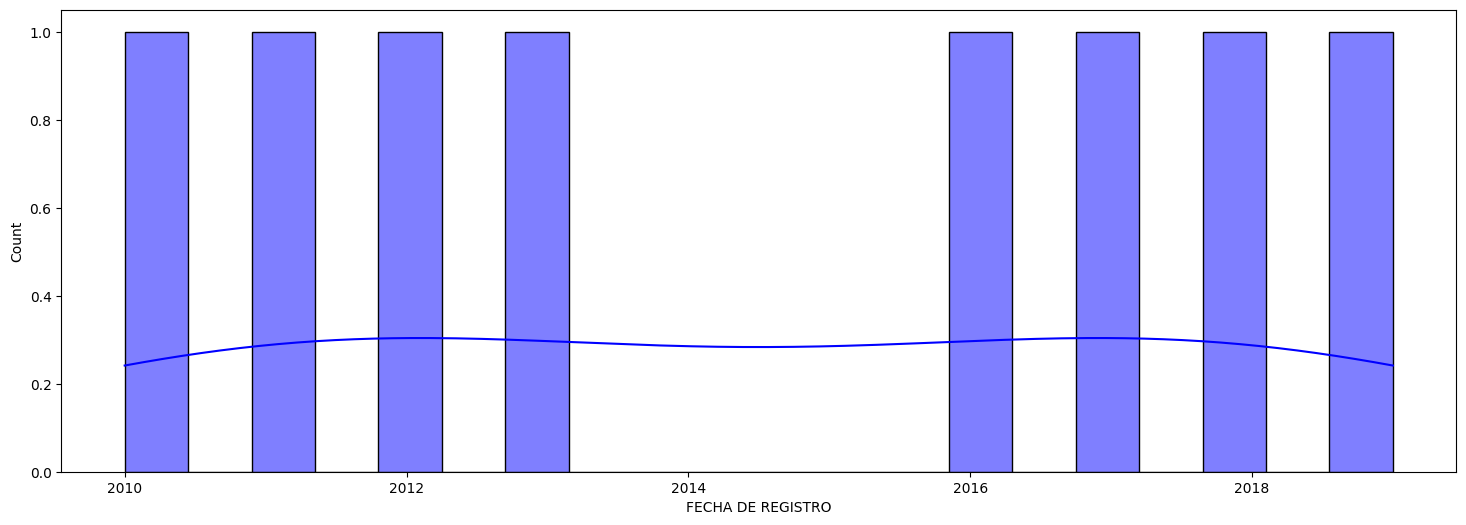

In [53]:
# Revisión visual del conjunto de datos:
  # Desplegamos un histograma para Fecha de Registro, y vemos que la distribución esta sesgada.

plt.figure(figsize = (18,6))
sns.histplot(x = cantidad['FECHA DE REGISTRO'], bins=20, kde = True, color = 'blue')

<Axes: xlabel='CANTIDAD DE REGISTROS', ylabel='Count'>

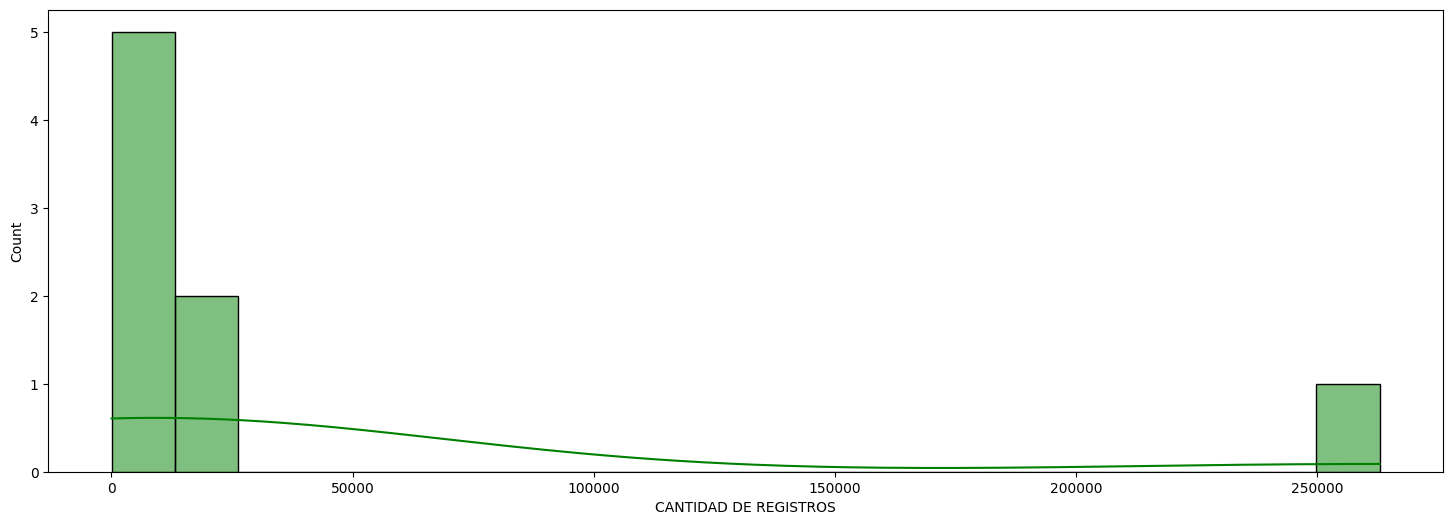

In [54]:
# Ahora revisamos la columna Cantidad de Registros. Realizamos un histograma para visualizar su distribución.

plt.figure(figsize = (18,6))
sns.histplot(x = cantidad['CANTIDAD DE REGISTROS'], bins=20, kde = True, color = 'green')

<Axes: ylabel='FECHA DE REGISTRO'>

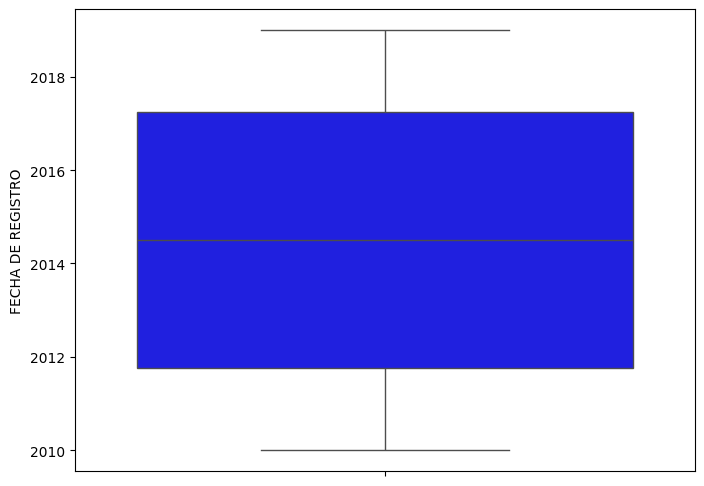

In [55]:
plt.figure(figsize= (8,6))
sns.boxplot(y = cantidad['FECHA DE REGISTRO'], color = 'blue')

<Axes: ylabel='CANTIDAD DE REGISTROS'>

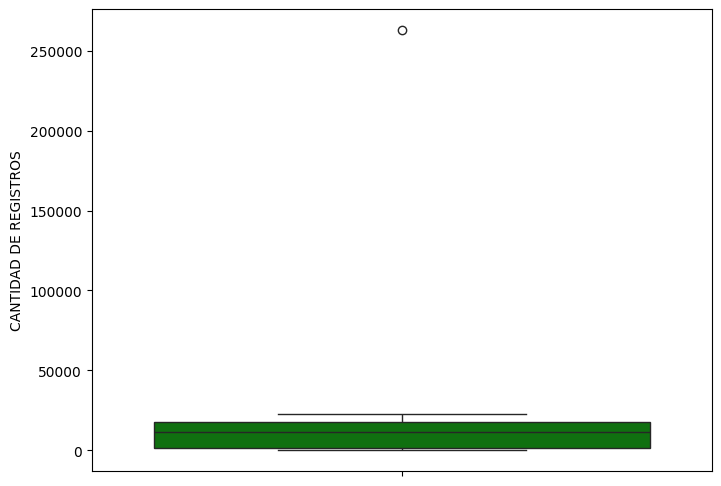

In [56]:
plt.figure(figsize= (8,6))
sns.boxplot(y = cantidad['CANTIDAD DE REGISTROS'], color = 'green')

#### Outliers y valores faltantes

In [57]:
# Outliers
  # Primero vamos a calcular el rango intercuartil. Para ello es necesario calcular el primer cuartil y el tercer cuartil:

Q1 = cantidad.quantile(0.25, axis=0)
Q1

FECHA DE REGISTRO        2011.75
CANTIDAD DE REGISTROS    1450.50
Name: 0.25, dtype: float64

In [58]:
# Outliers
  # Primero vamos a calcular el rango intercuartil. Para ello es necesario calcular el primer cuartil y el tercer cuartil:

Q3 = cantidad.quantile(0.75, axis=0)
Q3

FECHA DE REGISTRO         2017.25
CANTIDAD DE REGISTROS    17435.75
Name: 0.75, dtype: float64

In [59]:
IQR = Q3 - Q1
IQR

FECHA DE REGISTRO            5.50
CANTIDAD DE REGISTROS    15985.25
dtype: float64

In [60]:
cantidad_outliers = cantidad[((cantidad < (Q1 - 1.5 * IQR)) | 
                                    (cantidad > (Q3 + 1.5 * IQR))).any(axis = 1)]
cantidad_outliers

,FECHA DE REGISTRO,CANTIDAD DE REGISTROS
5,2017.0,262940


#### Relación entre variables:

Text(0, 0.5, 'CANTIDAD DE REGISTROS')

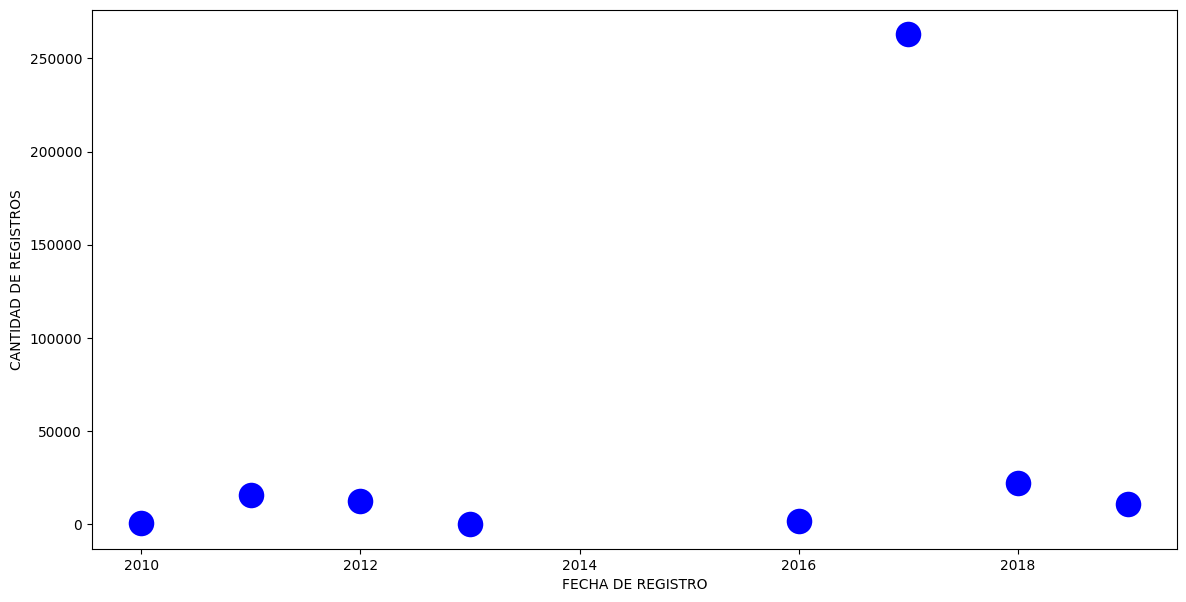

In [61]:
# Antes de realizar el modelo de regresión lineal, veamos la relación entre las variables 'YearsExperience' y 'Salary'
plt.figure(figsize=(14, 7))

sns.scatterplot(x = 'FECHA DE REGISTRO', y = 'CANTIDAD DE REGISTROS',
                s = 400, color = 'blue',
                data= cantidad
                )

plt.xlabel('FECHA DE REGISTRO')
plt.ylabel('CANTIDAD DE REGISTROS')

#### Datasets de entrenamiento y de pruebas

In [62]:
# Dataset con las variables predictoras
X = cantidad['FECHA DE REGISTRO']

# Dataset con la variable target
y = cantidad['CANTIDAD DE REGISTROS']

# Dividimos nuestro dataset en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [63]:
X_train.shape, X_test.shape

((5,), (3,))

In [64]:
# Convertimos los datos de entrenamiento a un array de numpy
# y luego remodelamos los datos de entrenamiento para asegurarnos que sea un arreglo multidimensional que conste de n filas y 1 columna

# Los datos de entrada de la variable predictora para el entrenamiento
X_train = X_train.to_numpy()
X_train = X_train.reshape((-1, 1))

# Los datos de entrada de la variable target para el entrenamiento
y_train = y_train.to_numpy()
y_train = y_train.reshape((-1, 1))

X_train.shape, y_train.shape

((5, 1), (5, 1))

In [65]:
# Convertimos los datos para pruebas a un array de numpy
# y luego remodelamos los datos para pruebas y asegurarnos que sea un arreglo multidimensional que conste de n filas y 1 columna

# Los datos de entrada de la variable predictora para las pruebas
X_test = X_test.to_numpy()
X_test = X_test.reshape((-1, 1))

# Los datos de entrada de la variable target para las pruebas
y_test = y_test.to_numpy()
y_test = y_test.reshape((-1, 1))

X_test.shape, y_test.shape

((3, 1), (3, 1))

In [66]:
# Con los datos de entrenamiento, creamos el modelo de regresión y lo entrenamos:

# Instanciamos un modelo de regresión lineal de scikit-learn
lr = LinearRegression()

# Entrenamos (ajustamos) nuestro modelo de regresión lineal con los datos de entrenamiento
linear_reg_model = lr.fit(X_train, y_train)

In [67]:
# Coeficientes del modelo de regresión lineal
linear_reg_model.coef_

array([[1584.99673203]])

#### Probando y Evaluando el modelo

In [68]:
# Ahora con nuestro modelo ya ajustado, lo probamos haciendo predicciones sobre nuestros datos de prueba:

# Realizamos predicciones con nuestro modelo de regresión utilizando los datos de prueba
y_pred = linear_reg_model.predict(X_test)

# Mostramos las primeras cinco estimaciones obtenidas
y_pred[:5]

array([[ 3830.61111111],
       [11755.59477124],
       [13340.59150327]])

In [69]:
# Evaluamos el puntaje (score) de nuestro modelo sobre los datos de entrenamiento:
print('Puntaje del modelo de regesión sobre los datos: ',linear_reg_model.score(X_train, y_train))

Puntaje del modelo de regesión sobre los datos:  0.44596638983731607


- Vemos un puntaje (R-Cuadrado) bajo cerca del 44%. Un poco más bajo que el que obtuvimos con los datos de entrenamiento, y esto es normal.

- Este puntaje nos indica el desempeño de nuestro modelo sobre datos nuevos que nunca ha visto.

Ahora realizamos un gráfico del modelo de regresión lineal que fue ajustado/entrenado sobre los datos de entrenamiento:

- Vamos a graficar un scatter plot de los puntos de datos de entrenamiento en color naranja
- Y luego graficamos un linea ajustada (tambien sobre los datos de entrenamiento) que represente nuestro modelo de regresión lineal: Y = coef*X + intercept

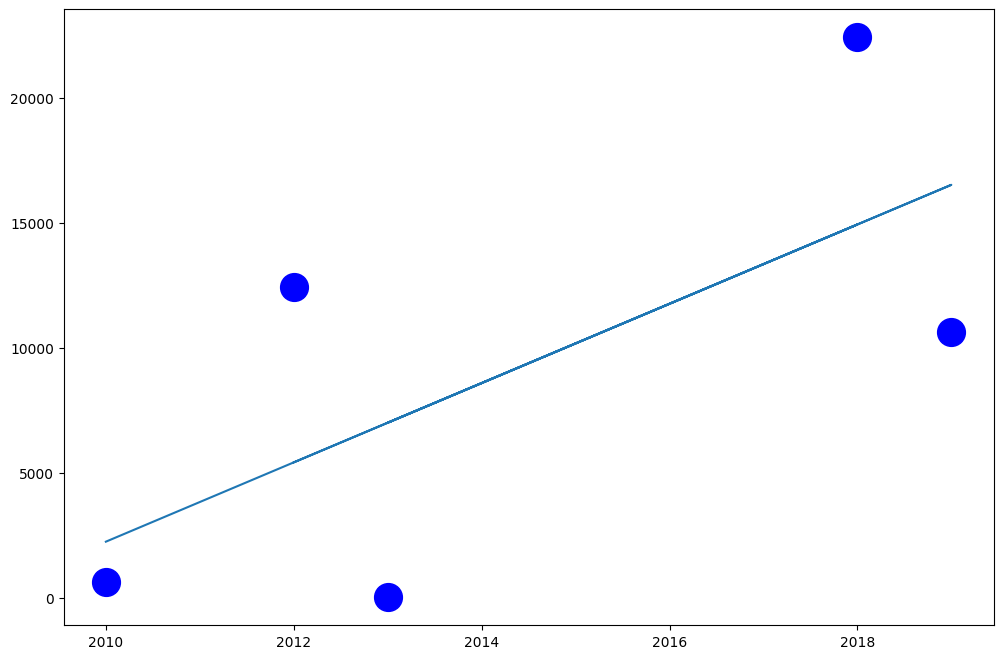

In [70]:
f, ax = plt.subplots(figsize = (12, 8))

# graficamos los puntos de datos de entrenamiento en color naranja
plt.plot(X_train, y_train, 'o', markersize = 20, color = 'blue')
# graficamos una linea utilizando nuestro modelo de regresión lineal sobre los datos predictores de entrenamiento
plt.plot(X_train , linear_reg_model.coef_ * X_train + linear_reg_model.intercept_)

In [71]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:
'''
    Realizamos predicciones sobre el conjunto de prueba y evaluamos el modelo calculando el error cuadrático medio (MSE) y el coeficiente de determinación (R cuadrado).
'''
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio y el coeficiente de determinación (R cuadrado)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio", mse)
print("Coeficiente de determinación (R cuadrado):", r2)

Error cuadrático medio 20847719160.025673
Coeficiente de determinación (R cuadrado): -0.4486730216070003


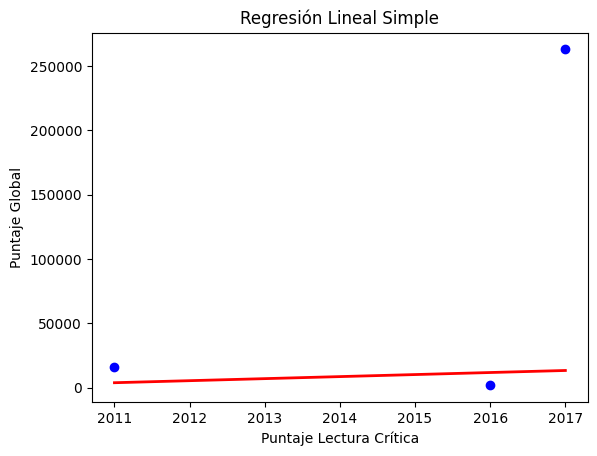

In [73]:
# Visualizar la relación entre las variables y la línea de regresión
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regresión Lineal Simple')
plt.xlabel('Puntaje Lectura Crítica')
plt.ylabel('Puntaje Global')
plt.show()

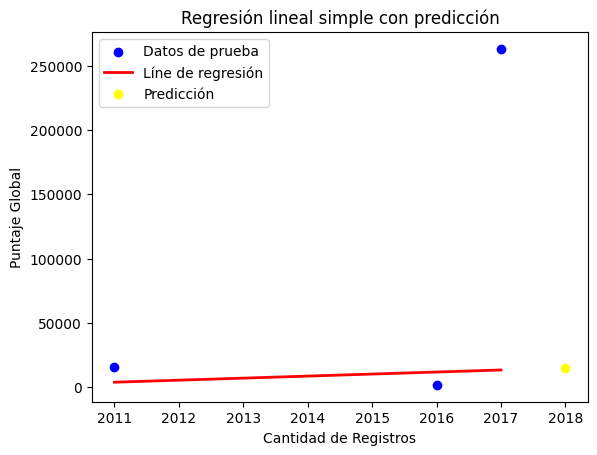

In [74]:
# Realizar una predicción para un valor específico de la variable independiente
cantidad_registros = 2018
puntaje_global_predicho = model.predict([[cantidad_registros]])

# Visualizar la predicción en la gráfica de dispersión
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(X_test, y_pred, color='red', linewidth=2, label = 'Líne de regresión')
plt.scatter(cantidad_registros,puntaje_global_predicho, color='yellow', label='Predicción')

plt.title('Regresión lineal simple con predicción')
plt.xlabel('Cantidad de Registros')
plt.ylabel('Puntaje Global')
plt.legend()
plt.show()

In [75]:
data = pd.read_csv('..\\Data\\Ciudadano_Digital.csv')

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058349 entries, 0 to 1058348
Data columns (total 40 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   TIPO DE DOCUMENTO          1058349 non-null  object 
 1   DOCUMENTO                  1058349 non-null  bool   
 2   EMAIL                      1058349 non-null  bool   
 3   CELULAR                    1058349 non-null  bool   
 4   TELEFONO                   1058349 non-null  bool   
 5   DEPARTAMENTO NACIMIENTO    285403 non-null   object 
 6   CIUDAD DE NACIMIENTO       285403 non-null   object 
 7   DEPARTAME_NOMBRE           853583 non-null   object 
 8   MUNICIPIO_NOMBRE           1031684 non-null  object 
 9   DIRECCION                  1058349 non-null  bool   
 10  NIVEL EDUCATIVO            1058349 non-null  object 
 11  SECTOR                     517441 non-null   object 
 12  ESTRATO                    1058349 non-null  object 
 13  FECHA DE NAC

In [77]:
total_elementos_por_columna = data.shape[0]
valores_nulos_por_columna = data.isna().sum()
porcentaje_vacios_por_columna = (valores_nulos_por_columna / total_elementos_por_columna) * 100
print("Porcentaje de valores vacíos por columna:")
print(porcentaje_vacios_por_columna)


Porcentaje de valores vacíos por columna:
TIPO DE DOCUMENTO             0.000000
DOCUMENTO                     0.000000
EMAIL                         0.000000
CELULAR                       0.000000
TELEFONO                      0.000000
DEPARTAMENTO NACIMIENTO      73.033187
CIUDAD DE NACIMIENTO         73.033187
DEPARTAME_NOMBRE             19.347682
MUNICIPIO_NOMBRE              2.519490
DIRECCION                     0.000000
NIVEL EDUCATIVO               0.000000
SECTOR                       51.108661
ESTRATO                       0.000000
FECHA DE NACIMIENTO          52.534844
EDAD                         54.894085
GENERO                       14.316261
DISCAPACIDAD                  0.000000
ALIADO                       75.150541
SECTOR ECONOMICO             57.889316
OCUPACION                    35.598560
FECHA DE REGISTRO            69.145906
COMUNIDAD ETNICA             48.406244
DINAMIZADOR                  79.878377
POBREZA                       0.000000
CABEZA DE HOGAR       

In [78]:
# Seleccionar variables categóricas
categorical_vars = ['TIPO DE DOCUMENTO','NIVEL EDUCATIVO','ESTRATO','DISCAPACIDAD']

# Convertir todas las variables categóricas a cadenas de texto
data[categorical_vars] = data[categorical_vars].astype(str)
data[categorical_vars]


,TIPO DE DOCUMENTO,NIVEL EDUCATIVO,ESTRATO,DISCAPACIDAD
0,CC,Profesional,3,Sin discapacidad
1,CC,No registra,No registra,No registra
2,CC,No registra,No registra,No registra
3,TI,Bachillerato,2,No registra
4,CC,No registra,No registra,No registra
...,...,...,...,...
1058344,CC,No registra,No registra,No registra
1058345,CC,Tecnico,1,No registra
1058346,CC,Profesional,2,Sin discapacidad
1058347,TI,Bachillerato,2,Sin discapacidad


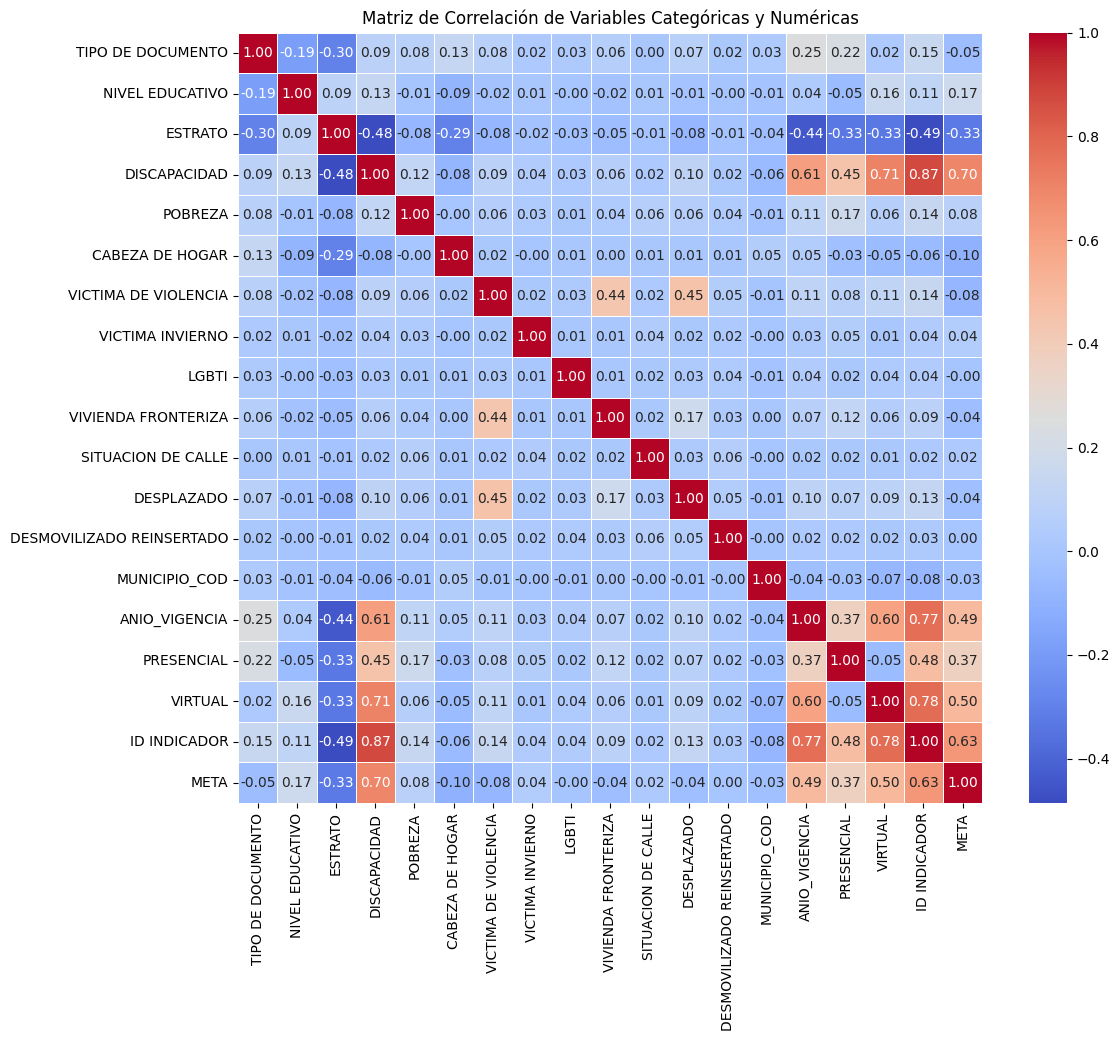

In [79]:

# Convertir variables categóricas a valores numéricos
label_encoder = LabelEncoder()
for var in categorical_vars:
    data[var] = label_encoder.fit_transform(data[var])

# Seleccionar variables numéricas
numeric_vars = ['POBREZA', 'CABEZA DE HOGAR', 'VICTIMA DE VIOLENCIA', 'VICTIMA INVIERNO', 'LGBTI', 'VIVIENDA FRONTERIZA',
                'SITUACION DE CALLE', 'DESPLAZADO', 'DESMOVILIZADO REINSERTADO', 'MUNICIPIO_COD' , 'ANIO_VIGENCIA', 'PRESENCIAL','VIRTUAL','ID INDICADOR','META']

# Calcular la matriz de correlación entre variables categóricas y numéricas
correlation_matrix = data[categorical_vars + numeric_vars].corr(method='kendall')

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Añadir título
plt.title('Matriz de Correlación de Variables Categóricas y Numéricas')

# Mostrar el mapa de calor
plt.show()

Viendo e interpretando los anteriores resultados, podemos acotar el 'universo' de la correlación

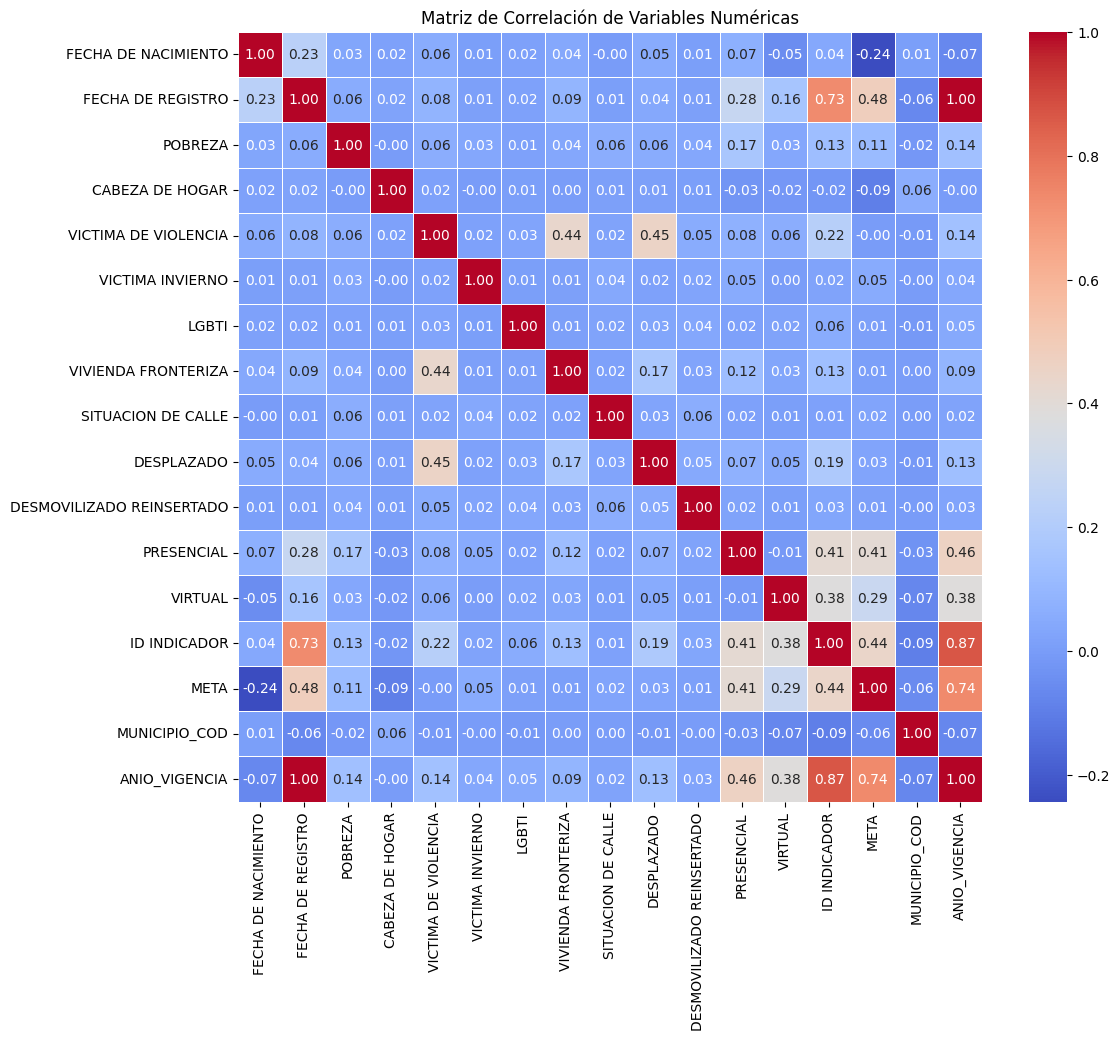

In [80]:
# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include=['float64','int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Añadir título
plt.title('Matriz de Correlación de Variables Numéricas')

# Mostrar el mapa de calor
plt.show()

In [81]:
# Seleccionar las características y la variable objetivo
X = data[['TIPO DE DOCUMENTO','NIVEL EDUCATIVO','ESTRATO','DISCAPACIDAD']]
y = data['ANIO_VIGENCIA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
#Construir la red neuronal

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

c:\Users\cc_ca\OneDrive\Escritorio\Desarrollo web\Analisis de Datos\Python\Scripts\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [84]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
21167/21167 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 359447.3438 - val_loss: 12.9439
Epoch 2/10
21167/21167 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 8.6563 - val_loss: 2.9569
Epoch 3/10
21167/21167 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 3.2682 - val_loss: 4.1918
Epoch 4/10
21167/21167 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 2.8048 - val_loss: 2.0530
Epoch 5/10
21167/21167 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 2.4207 - val_loss: 2.2659
Epoch 6/10
21167/21167 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 2.2237 - val_loss: 1.9131
Epoch 7/10
21167/21167 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step - loss: 2.1889 - val_loss: 2.2713
Epoch 8/10
21167/21167 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 2.1663 - val_loss: 1.7449
Epoch 9/10
21167/21167 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - loss: 2.1337 - val_loss: 2.2011
Epoch 10/10
21167/21167 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 2.1423 - val_loss: 2.2902


In [85]:
loss = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error (MSE) en datos de prueba:", loss)

6615/6615 ━━━━━━━━━━━━━━━━━━━━ 5s 809us/step - loss: 2.2928
Mean Squared Error (MSE) en datos de prueba: 2.283069372177124


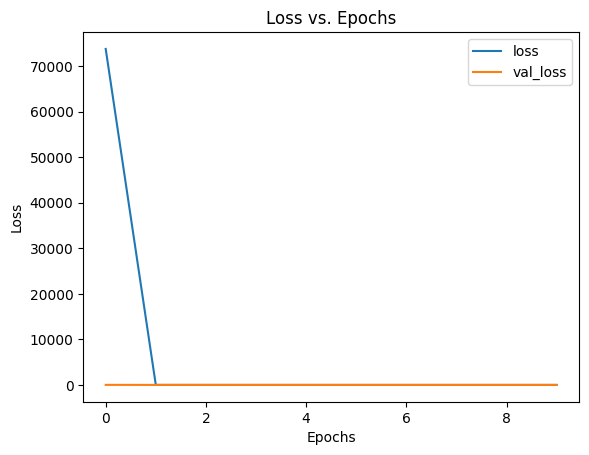

In [86]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

6615/6615 ━━━━━━━━━━━━━━━━━━━━ 5s 691us/step


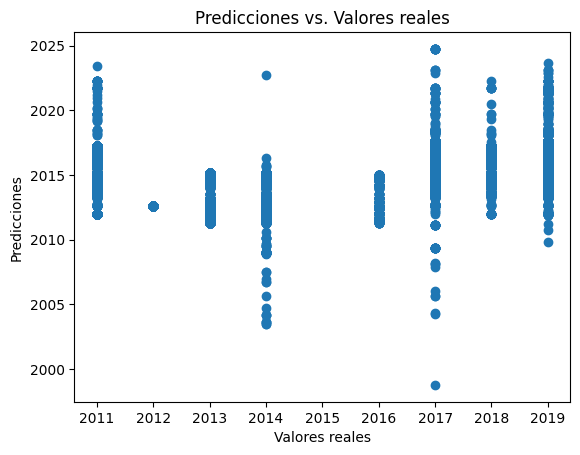

In [87]:
# Realizar predicciones para los datos de prueba
predictions = model.predict(X_test_scaled)

# Comparar las predicciones con los valores reales
plt.scatter(y_test, predictions)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores reales')
plt.show()

### Conclusión

Se evidencio que los datos disponibles no son suficientes para realizar predicciones precisas sobre la cantidad de inscritos en futuras convocatorias. La falta de información relevante y detallada en el conjunto de datos actual limita la capacidad de los modelos de regresión lineal para identificar patrones confiables y hacer predicciones precisas, de igual forma se evidencia en el entrenamiento de la red neuronal.

>Observaciones:

* Se realiza revisión del por que se presentan diferencias entre los años, y se encuentra:
    * Se presentan cambios de gobierno, lo cual realiza hace que en algunos años se presente mas participacion de la ciudadania
    * Se observa que en el año 2017, en el cual se presenta mayor participación, lo cual se puede consultar en los enlaces 
      *  https://mintic.gov.co/portal/inicio/Sala-de-prensa/Noticias/60545:MinTIC-lanzo-la-estrategia-de-Ciudadania-Digital-para-que-los-colombianos-aprovechen-las-oportunidades-de-la-economia-digital
      *  https://mintic.gov.co/portal/vivedigital/612/w3-propertyvalue-19437.html
      *  https://www.mineducacion.gov.co/portal/salaprensa/Comunicados/360767:Inicia-Virtual-Educa-Colombia-2017-el-encuentro-internacional-de-educacion-innovacion-y-tecnologia
      *  https://minciencias.gov.co/sites/default/files/plan-ctei-tic-2017-2022_0.pdf
      

>Recomendaciones:

* Mejorar la calidad de la información recopilada: Se recomienda recopilar datos más detallados y relevantes en futuras convocatorias. Esto podría incluir información sobre:
* Antecedentes educativos y profesionales de los participantes
* Motivaciones e intereses de los participantes
* Factores externos que podrían afectar la inscripción, como la situación económica o las ofertas laborales
* Explorar modelos de predicción alternativos: Además de la regresión lineal, se podrían explorar otros modelos de predicción que sean más adecuados para manejar conjuntos de datos con información incompleta o no lineal.
* Desarrollar formularios con información diciente, que le permita al ministerio, o a los entes que proyecten programas de formación, crear planes realistas a las necesidades de los ciudadanos


> Beneficios:

* Modelos predictivos más sólidos: Al contar con datos de mejor calidad y modelos de predicción más adecuados, se podrán realizar predicciones más precisas sobre la cantidad de inscritos en futuras convocatorias.
* Toma de decisiones más informada: Con predicciones más precisas, las instituciones podrán tomar decisiones más informadas en relación con la selección de cursos.